In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import random


values = {}

In [15]:
# Load MNIST dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transform)


In [20]:
np.mean([1,2,433,44])

120.0

In [16]:
def get_clean_images_by_label(mnist_train, num_images=10):
    """
    Extract num_images clean images for each label (0-9) from mnist_train.
    Returns a dictionary with labels as keys and a list of clean images as values.
    """
    clean_images = {label: [] for label in range(10)}

    for label in range(10):
        # Filter the indices for the current label
        class_indices = [i for i, lbl in enumerate(mnist_train.targets) if lbl == label]
        
        # Get the first num_images clean images for the current label
        clean_images[label] = [mnist_train[i][0].squeeze().numpy() for i in class_indices[:num_images]]

    return clean_images

# Example usage:
clean_images = get_clean_images_by_label(mnist_train, num_images=10)

(28, 28)

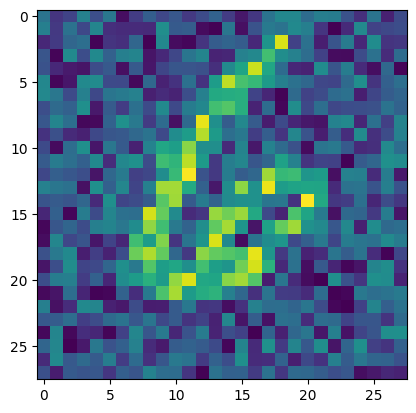

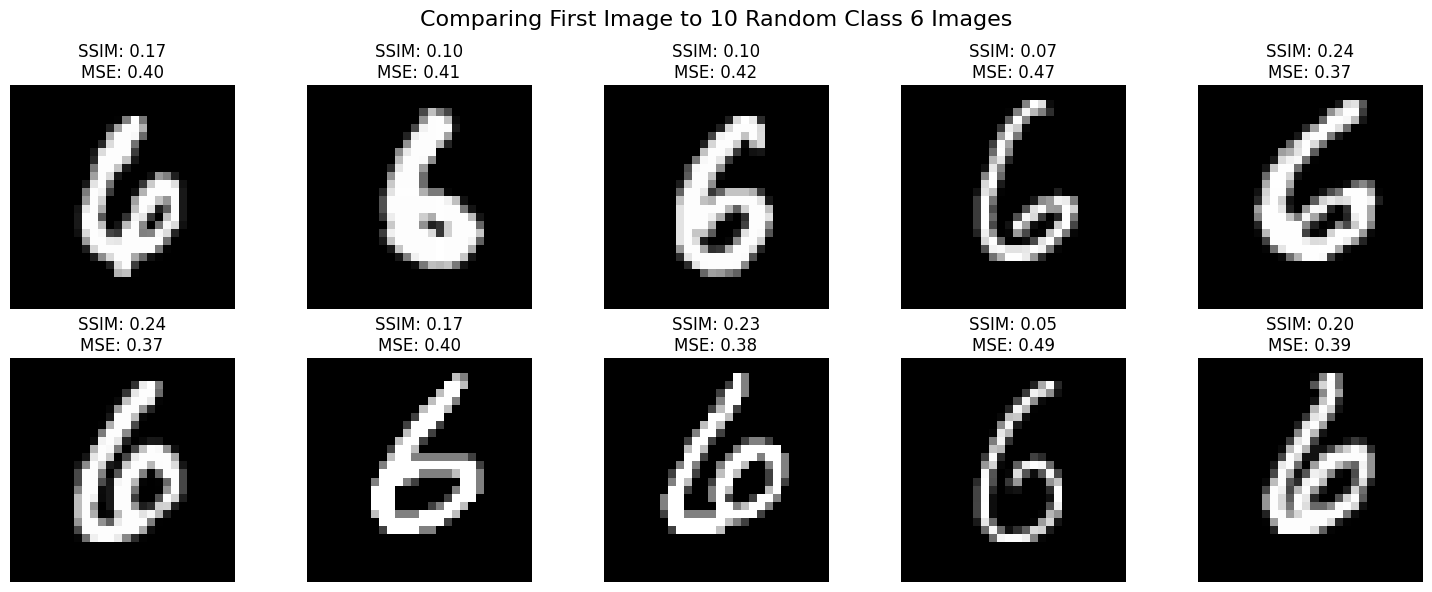

SSIM mean / max 0.15679006186010627 0.23815917123825947
MSE mean/max 0.41251755 0.49352163


In [8]:


# Function to calculate MSE
def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)


LABEL = np.random.randint(9)

# Filter out class 6 images from the dataset
class_6_indices = [i for i, label in enumerate(mnist_train.targets) if label == LABEL]
first_11_class_6_indices = class_6_indices[:11]

# Extract the first 11 images of class 6
first_11_class_6_images = [mnist_train[i][0].squeeze().numpy() for i in first_11_class_6_indices]

# Select 10 random images (excluding the first one)
random_indices = random.sample(range(1, 11), 10)

# Plot the first image and compare it to 10 random images with SSIM scores
first_image = first_11_class_6_images[0]

first_image += np.random.rand(first_image.shape[0],first_image.shape[1])


plt.imshow(first_image)
plt.show()

ssim_values = []
MSE = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, idx in zip(axes.ravel(), random_indices):
    other_image = first_11_class_6_images[idx]

    ssim_index = ssim(first_image, other_image, data_range=1.0)
    mse_value = mse(first_image, other_image)
    
    ssim_values.append(ssim_index)
    MSE.append(mse_value)

    # Plot the image
    ax.imshow(other_image, cmap='gray')
    
    # Set title with SSIM and MSE
    ax.set_title(f"SSIM: {ssim_index:.2f}\nMSE: {mse_value:.2f}")
    ax.axis('off')



# Plot the reference first image
fig.suptitle('Comparing First Image to 10 Random Class 6 Images', fontsize=16)
plt.tight_layout() 
plt.show()
   
ssim_values = np.array(ssim_values)
MSE = np.array(MSE)
print("SSIM mean / max", ssim_values.mean(), ssim_values.max())
print("MSE mean/max", MSE.mean(), MSE.max())

values["all_same_SSIM"] = (ssim_values.mean(), ssim_values.max())
values["all_same_MSE"] = (MSE.mean(), MSE.max())

In [9]:
z = np.random.randint(20)

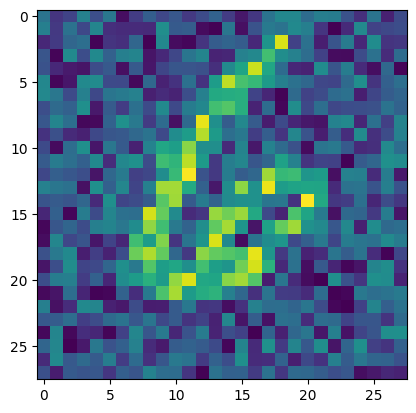

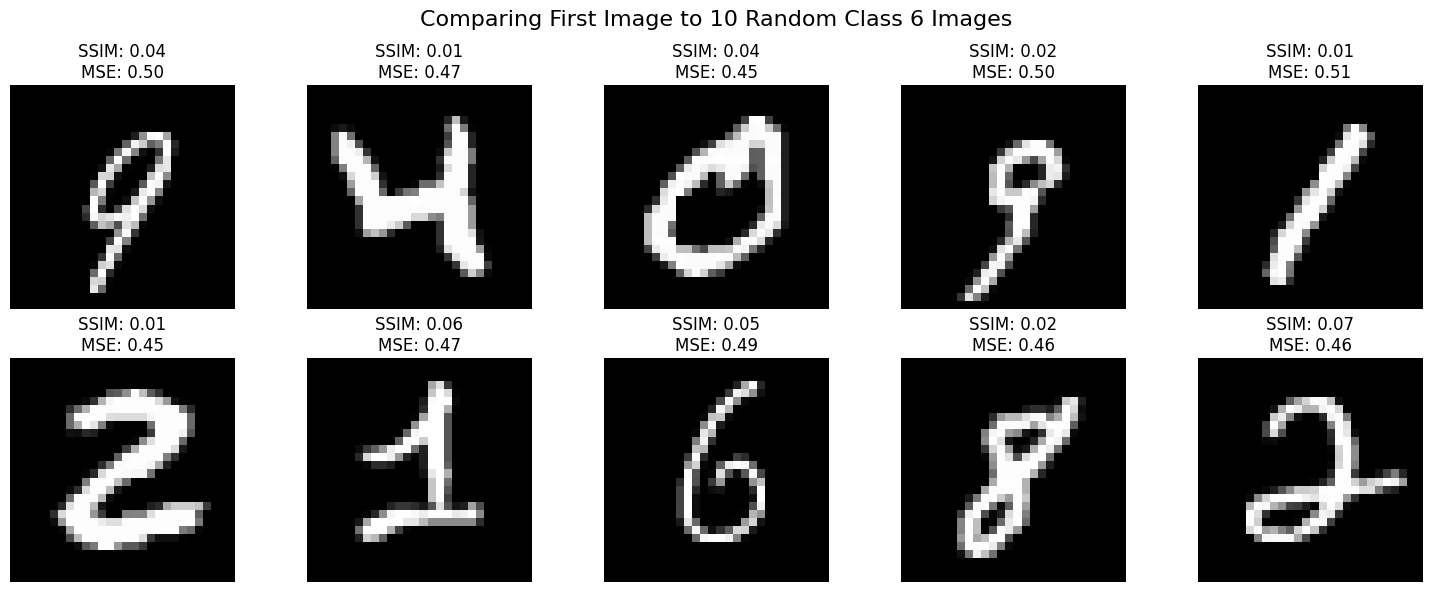

SSIM mean / max 0.031603986325498046 0.06721026184682996
MSE mean/max 0.47555107 0.51350504


In [10]:

# Filter out class 6 images from the dataset
class_6_indices = [i for i, label in enumerate(mnist_train.targets)]
first_11_class_6_indices = class_6_indices[z:z+11]

# Extract the first 11 images of class 6
first_11_class_6_images = [mnist_train[i][0].squeeze().numpy() for i in first_11_class_6_indices]

# Select 10 random images (excluding the first one)
random_indices = random.sample(range(1, 11), 10)

plt.imshow(first_image)
plt.show()

ssim_values = []
MSE = []

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, idx in zip(axes.ravel(), random_indices):
    other_image = first_11_class_6_images[idx]
    ssim_index = ssim(first_image, other_image, data_range=1.0)
    
    mse_value = mse(first_image, other_image)
    
    ssim_values.append(ssim_index)
    MSE.append(mse_value)

    # Plot the image
    ax.imshow(other_image, cmap='gray')
    
    # Set title with SSIM and MSE
    ax.set_title(f"SSIM: {ssim_index:.2f}\nMSE: {mse_value:.2f}")
    ax.axis('off')


# Plot the reference first image
fig.suptitle('Comparing First Image to 10 Random Class 6 Images', fontsize=16)
plt.tight_layout()
plt.show()


ssim_values = np.array(ssim_values)
MSE = np.array(MSE)
print("SSIM mean / max", ssim_values.mean(), ssim_values.max())
print("MSE mean/max", MSE.mean(), MSE.max())

values["diff_SSIM"] = (ssim_values.mean(), ssim_values.max())
values["diff_MSE"] = (MSE.mean(), MSE.max())

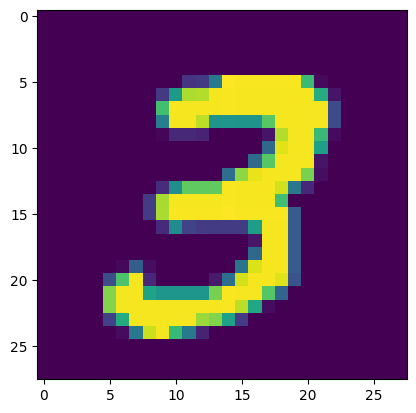

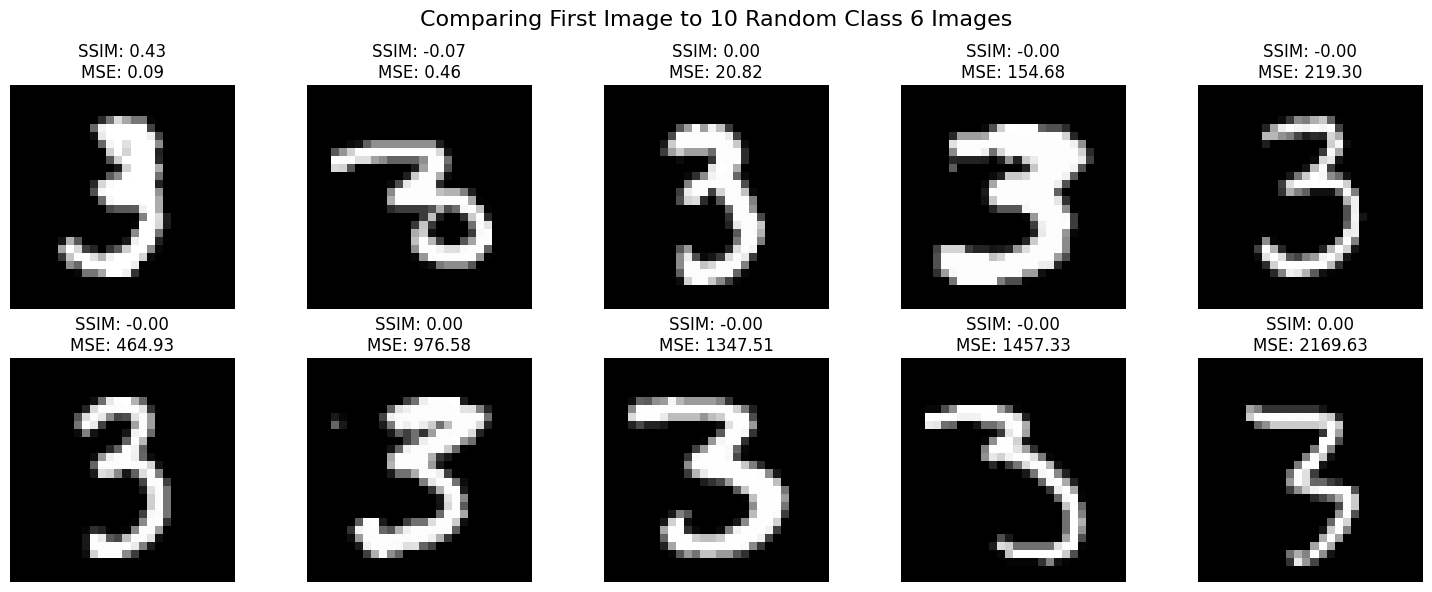

SSIM mean / max 0.03668519299798474 0.43320885709916657
MSE mean/max 681.1322 2169.6292


In [14]:


# Function to calculate MSE
def mse(imageA, imageB):
    return np.mean((imageA - imageB) ** 2)

# Load MNIST dataset using PyTorch
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=transform)

LABEL = np.random.randint(9)

# Filter out class 6 images from the dataset
class_6_indices = [i for i, label in enumerate(mnist_train.targets) if label == LABEL]
first_11_class_6_indices = class_6_indices[:11]

# Extract the first 11 images of class 6
first_11_class_6_images = [mnist_train[i][0].squeeze().numpy() for i in first_11_class_6_indices]

# Select 10 random images (excluding the first one)
random_indices = random.sample(range(1, 11), 10)

# Plot the first image and compare it to 10 random images with SSIM scores
first_image = first_11_class_6_images[0]



plt.imshow(first_image)
plt.show()

ssim_values = []
MSE = []
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, idx in zip(axes.ravel(), random_indices):
    other_image = first_11_class_6_images[idx]

    ssim_index = ssim(first_image, other_image, data_range=1.0)
    mse_value = mse(first_image, other_image)
    
    ssim_values.append(ssim_index)
    MSE.append(mse_value)

    # Plot the image
    ax.imshow(other_image, cmap='gray')
    
    # Set title with SSIM and MSE
    ax.set_title(f"SSIM: {ssim_index:.2f}\nMSE: {mse_value:.2f}")
    ax.axis('off')


    first_image += np.random.rand(first_image.shape[0],first_image.shape[1]) * (0.95 - 2*idx)   



# Plot the reference first image
fig.suptitle('Comparing First Image to 10 Random Class 6 Images', fontsize=16)
plt.tight_layout() 
plt.show()
   
ssim_values = np.array(ssim_values)
MSE = np.array(MSE)
print("SSIM mean / max", ssim_values.mean(), ssim_values.max())
print("MSE mean/max", MSE.mean(), MSE.max())